## Imports

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

import re

from wordcloud import WordCloud
import contractions

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.size'] = 15

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

import warnings
warnings.filterwarnings("ignore")

## Data Load

In [2]:
df_train = pd.read_csv('../Datasets/disaster_tweet/train.csv')
df_train.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [3]:
df_train.tail(20)

,id,keyword,location,text,target
7593,10848,NaN,NaN,I just heard a really loud bang and everyone is asleep great,0
7594,10849,NaN,NaN,A gas thing just exploded and I heard screams and now the whole street smells of gas ... ??,1
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby County until 08:00 PM Wednesday. http://t.co/nZ7ACKRrJi #tnwx,1
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunderstorm Warnings for parts of #AR #NC #OK. Expect more trauma cases: http://t.co/FWqfCKNCQW,1
7597,10852,NaN,NaN,#??? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ... http://t.co/5B7qT2YxdA,1
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Overtaking and Collided #BathAndNorthEastSomerset http://t.co/fa3FcnlN86,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt: http://t.co/EDyfo6E2PU http://t.co/M5KxLPKFA1,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been costlier bigger than projected http://t.co/5ueCmcv2Pk,1
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney tornado warning ??,1


### Observation

1. Mixed case
2. Contractions
3. Hashtags and mentions
4. Incorrect spellings
5. Punctuations
6. websites and urls

## Functions

In [4]:
all_text = ' '.join(list(df_train['text']))

def check_texts(check_item, all_text):
    return check_item in all_text

In [5]:
print(check_texts('<a', all_text))
print(check_texts('<div', all_text))
print(check_texts('<p', all_text))

False
False
False


In [6]:
print(check_texts('#x', all_text))

False


In [7]:
print(check_texts(':)', all_text))
print(check_texts('<3', all_text))
print(check_texts('heard', all_text))

True
False
True


In [8]:
def remove_urls(text):
    ''' This method takes in text to remove urls and website links, if any'''
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)
    return text

def remove_html_entities(text):
    ''' This method removes html tags'''
    html_entities = r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});'
    text = re.sub(html_entities, '', text)
    return text

def convert_lower_case(text):
    return text.lower()

def detect_news(text):
    if 'news' in text:
        text = text + ' news'
    return text

def remove_social_media_tags(text):
    ''' This method removes @ and # tags'''
    tag_pattern = r'@([a-z0-9]+)|#'
    text = re.sub(tag_pattern, '', text)
    return text

# Count it before I remove them altogether
def count_punctuations(text):
    getpunctuation = re.findall('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?',text)
    return len(getpunctuation)


def preprocess_text(x):
    cleaned_text = re.sub(r'[^a-zA-Z\d\s]+', '', x)
    word_list = []
    for each_word in cleaned_text.split(' '):
        word_list.append(contractions.fix(each_word).lower())
    word_list = [wnl.lemmatize(each_word.strip()) for each_word in word_list if each_word not in STOPWORDS and each_word.strip() != '']
    return " ".join(word_list)

In [10]:
df_train['text'] = df_train['text'].apply(remove_urls)
df_train['text'] = df_train['text'].apply(remove_html_entities)
df_train['text'] = df_train['text'].apply(convert_lower_case)
df_train['text'] = df_train['text'].apply(detect_news)
df_train['text'] = df_train['text'].apply(remove_social_media_tags)
df_train['punctuation_count'] = df_train['text'].apply(count_punctuations)
df_train['text'] = df_train['text'].apply(preprocess_text)

df_train['text_tokenized'] = df_train['text'].apply(word_tokenize)
df_train['words_per_tweet'] = df_train['text_tokenized'].apply(len)

In [11]:
df_train

,id,keyword,location,text,target,punctuation_count,text_tokenized,words_per_tweet
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1,0,"[deed, reason, earthquake, may, allah, forgive, u]",7
1,4,NaN,NaN,forest fire near la ronge sask canada,1,1,"[forest, fire, near, la, ronge, sask, canada]",7
2,5,NaN,NaN,resident asked shelter place notified officer evacuation shelter place order expected,1,3,"[resident, asked, shelter, place, notified, officer, evacuation, shelter, place, order, expected]",11
3,6,NaN,NaN,13000 people receive wildfire evacuation order california,1,1,"[13000, people, receive, wildfire, evacuation, order, california]",7
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pours school,1,0,"[got, sent, photo, ruby, alaska, smoke, wildfire, pours, school]",9
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane holding bridge collapse nearby home,1,0,"[two, giant, crane, holding, bridge, collapse, nearby, home]",8
7609,10870,NaN,NaN,ahrary control wild fire california even northern part state troubling,1,2,"[ahrary, control, wild, fire, california, even, northern, part, state, troubling]",10
7610,10871,NaN,NaN,m194 0104 utc5km volcano hawaii,1,6,"[m194, 0104, utc5km, volcano, hawaii]",5
7611,10872,NaN,NaN,police investigating ebike collided car little portugal ebike rider suffered serious nonlife threatening injury,1,5,"[police, investigating, ebike, collided, car, little, portugal, ebike, rider, suffered, serious, nonlife, threatening, injury]",14


## Tweet Length Analysis

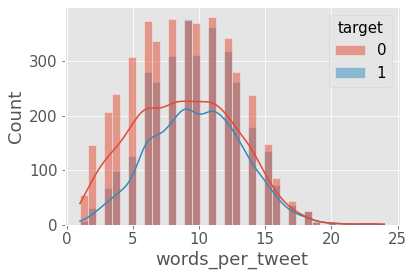

In [12]:
sns.histplot(x='words_per_tweet', hue='target', data=df_train, kde=True)
plt.show()

## Punctuation Analysis

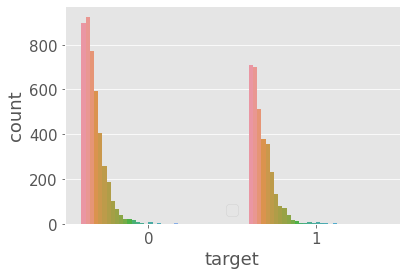

In [13]:
sns.countplot(x='target', hue='punctuation_count', data=df_train)
plt.legend([])
plt.show()

## Tweet Text Analysis using WordCloud

In [14]:
real_disaster_tweets = ' '.join(list(df_train[df_train['target'] == 1]['text']))

In [15]:
real_disaster_tweets

'deed reason earthquake may allah forgive u forest fire near la ronge sask canada resident asked shelter place notified officer evacuation shelter place order expected 13000 people receive wildfire evacuation order california got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado spring area i am top hill see fire wood there is emergency evacuation happening building across street i am afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa going to going to fvck flooding raining flooding florida tampabay tampa 18 19 day i have lost count flood bago myanmar arrived bago damage school bus 80 multi car crash breaking wholesale market ablaze africanbaze breaking newsnigeria flag set ablaze aba news inec office abia set ablaze barbados bridgetown jamaica two car se

In [16]:
non_real_disaster_tweets = ' '. join(list(df_train[df_train['target'] == 0]['text']))

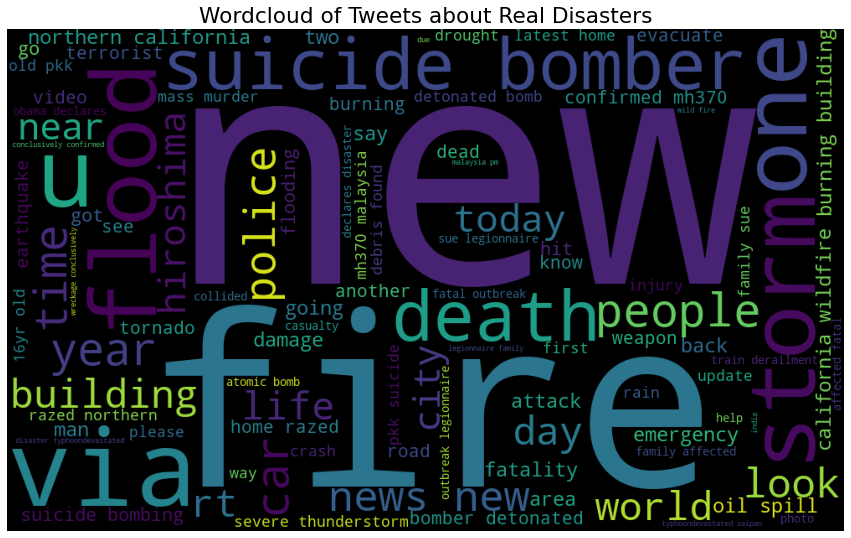

In [17]:
wc = WordCloud(background_color="black", 
               max_words=100, 
               width=1000, 
               height=600, 
               random_state=1).generate(real_disaster_tweets)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of Tweets about Real Disasters")
plt.show()

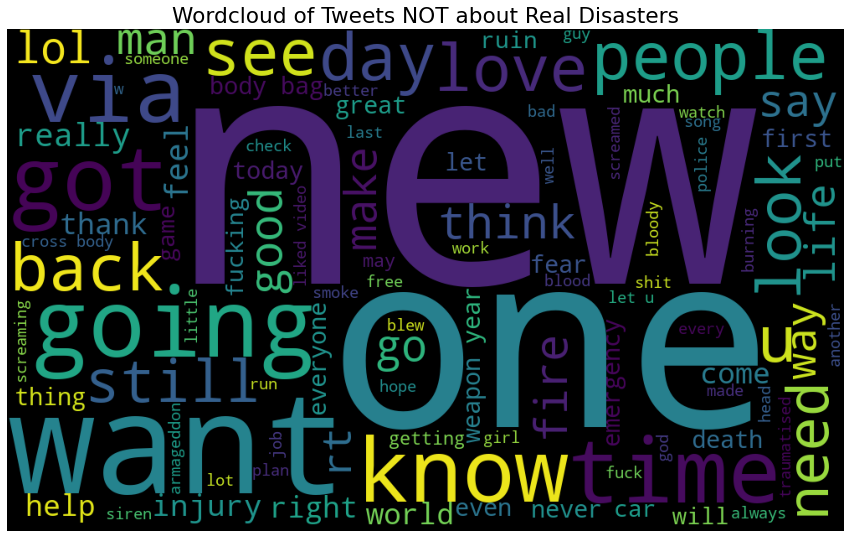

In [18]:
wc = WordCloud(background_color="black", 
               max_words=100, 
               width=1000, 
               height=600,
               font_step=1,
               random_state=1).generate(non_real_disaster_tweets)

plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud of Tweets NOT about Real Disasters")
plt.show()

## TF-IDF

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [20]:
target = df_train['target'].values # classes - 0s and 1s
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], target, random_state=0)

In [21]:
tf_idf = TfidfVectorizer(min_df=0.,
                         max_df=1.,
                         use_idf=True)

In [22]:
tfidf_vector = tf_idf.fit(X_train)

In [23]:
list(tfidf_vector.vocabulary_.items())[:10]

[('refugio', 8890),
 ('oil', 7734),
 ('spill', 10128),
 ('may', 6841),
 ('costlier', 2760),
 ('bigger', 1601),
 ('projected', 8525),
 ('plain', 8248),
 ('american', 931),
 ('pipeline', 8218)]

In [24]:
tf_idf_train = tf_idf.transform(X_train)

In [25]:
tf_idf_test = tf_idf.transform(X_test)

In [26]:
clf = LogisticRegression()
clf.fit(tf_idf_train, y_train)

LogisticRegression()

In [27]:
y_pred_log_reg = clf.predict(tf_idf_test)

In [28]:
accuracy_score(y_test, y_pred_log_reg)

0.8061974789915967

In [29]:
precision_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_log_reg)

(0.8282208588957055, 0.6775407779171895, 0.7453416149068323)

**Future Work**

1. Testing different algorithms
2. Test different tf-idf settings, like set idf=False, then, only term frequency will be considered
3. Hyperparameter Tuning

## GloVe and Neural Nets

Embedding Layer - learn an embedding for all of the words in the training dataset. It is defined as the first hidden layer of a network.

It is a flexible layer that can be used in a variety of ways, such as:
* It can be used alone to learn a word embedding that can be saved and used in another model later.
* It can be used as part of a deep learning model where the embedding is learned along with the model itself.
* It can be used to load a pre-trained word embedding model, a type of transfer learning.

Resources - 

1. https://keras.io/api/layers/core_layers/embedding/

2. https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

### Using Keras API's Embedding Layer

In [30]:
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from keras.layers import Flatten

In [31]:
glove_file = r'C:\Users\nroy0\Documents\Resources\glove.6B\glove.6B.300d.txt'
w2v_file = get_tmpfile("glove_w2v.txt")
glove2word2vec(glove_file, w2v_file)

(400000, 300)

In [32]:
w2v_model = KeyedVectors.load_word2vec_format(w2v_file)

In [33]:
vocab = w2v_model.key_to_index.keys()

glove_embedding_matrix = w2v_model[vocab]
glove_embedding_matrix

array([[ 0.04656  ,  0.21318  , -0.0074364, ...,  0.0090611, -0.20989  ,
         0.053913 ],
       [-0.25539  , -0.25723  ,  0.13169  , ..., -0.2329   , -0.12226  ,
         0.35499  ],
       [-0.12559  ,  0.01363  ,  0.10306  , ..., -0.34224  , -0.022394 ,
         0.13684  ],
       ...,
       [ 0.075713 , -0.040502 ,  0.18345  , ...,  0.21838  ,  0.30967  ,
         0.43761  ],
       [ 0.81451  , -0.36221  ,  0.31186  , ...,  0.075486 ,  0.28408  ,
        -0.17559  ],
       [ 0.429191 , -0.296897 ,  0.15011  , ...,  0.28975  ,  0.32618  ,
        -0.0590532]], dtype=float32)

In [34]:
target = df_train['target'].values
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], target, random_state=0)

In [ ]:
max_length = 1000
tokenizer = Tokenizer(oov_token = "<OOV>", num_words=max_length)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequences_train, padding = 'post', maxlen=max_length)
padded_test = pad_sequences(sequences_test, padding = 'post', maxlen=max_length)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
keys_not_present = []
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = w2v_model.get_vector(word)
        embedding_matrix[i] = embedding_vector
    except KeyError as e:
        keys_not_present.append(word)

In [ ]:
print(keys_not_present)

In [ ]:
embedding_matrix.shape

In [ ]:
def get_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 
                        300, 
                        weights=[embedding_matrix], 
                        input_length=max_length,
                        trainable=False))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  patience=15,
                                  verbose=1,
                                  mode="min",
                                  restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath='model.hdf5',
                                    verbose=1,
                                    save_best_only=True)
]

In [ ]:
model = get_model()
print(model.summary())

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
tf.config.run_functions_eagerly(True) 
## Stackoverflow - https://stackoverflow.com/questions/58352326/running-the-tensorflow-2-0-code-gives-valueerror-tf-function-decorated-functio
history = model.fit(padded_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(padded_test, y_test), 
                    callbacks=callbacks)

In [ ]:
model = keras.models.load_model('model.hdf5')
y_pred = (model.predict(padded_test) > 0.5).astype("int32")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

### Using Embedding Layer + LSTM

In [ ]:
def get_lstm_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 
                        300, 
                        weights=[embedding_matrix], 
                        input_length=max_length,
                        trainable=False))
    model.add(LSTM(100))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  verbose=1,
                                  mode="min",
                                  restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath='lstm_model.hdf5',
                                    verbose=1,
                                    save_best_only=True)
]

In [ ]:
model = get_lstm_model()
print(model.summary())

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
tf.config.run_functions_eagerly(True)
## Stackoverflow - https://stackoverflow.com/questions/58352326/running-the-tensorflow-2-0-code-gives-valueerror-tf-function-decorated-functio
history = model.fit(padded_train, 
                    y_train, 
                    epochs=2, 
                    validation_data=(padded_test, y_test), 
                    callbacks=callbacks)

In [ ]:
model = keras.models.load_model('lstm_model.hdf5')
y_pred = (model.predict(padded_test) > 0.5).astype("int32")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))